### Import and Preprocess the Dataset:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('Housing.csv')
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
#  Check Missing Values

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Split Data into Train-Test Sets:

In [9]:
# Features (excluding the 'price' column)
X = df.drop('price', axis=1)  # Drop the target column 'price'
y = df['price']  # Target variable 'price'

# Split into training and testing data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Check column names
print(df.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


### Fit a Linear Regression Model:

In [10]:
# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

### Evaluate the Model Using MAE, MSE, and R²:

In [11]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 970043.4039201641
MSE: 1754318687330.6643
R²: 0.6529242642153184


### Plot the Regression Line:

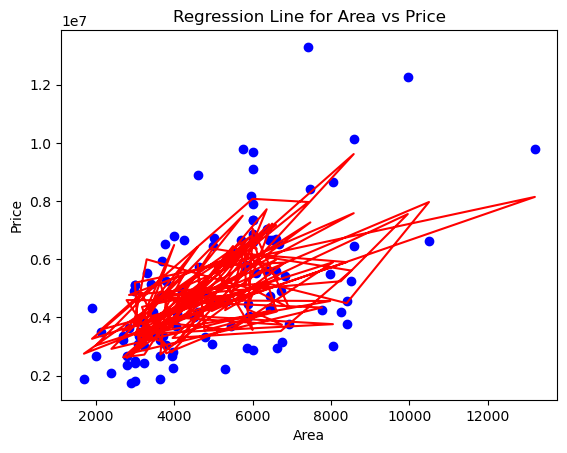

In [13]:


# Assuming 'area' is the feature for simple linear regression
plt.scatter(X_test['area'], y_test, color='blue')  # Actual values

plt.plot(X_test['area'], y_pred, color='red')  # Predicted line (for simple regression)

plt.title('Regression Line for Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


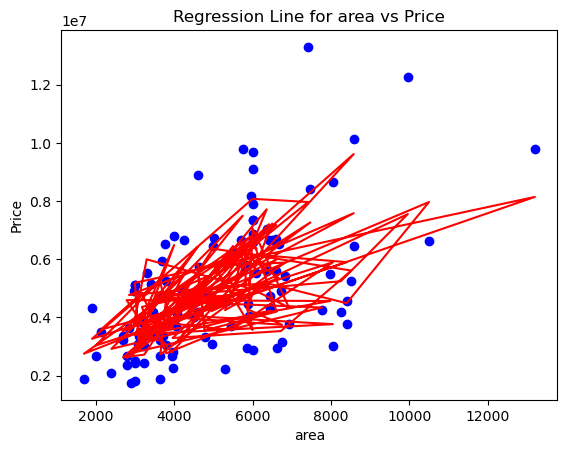

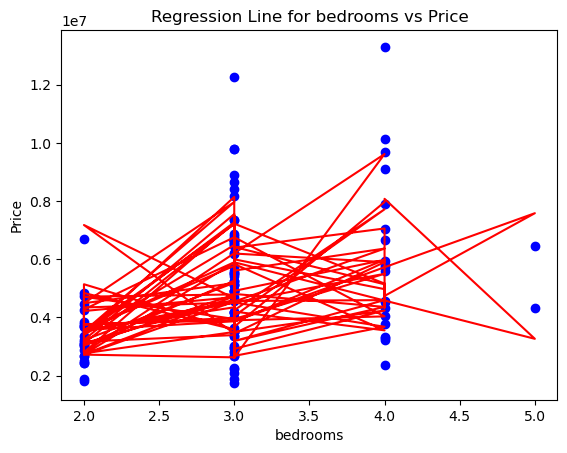

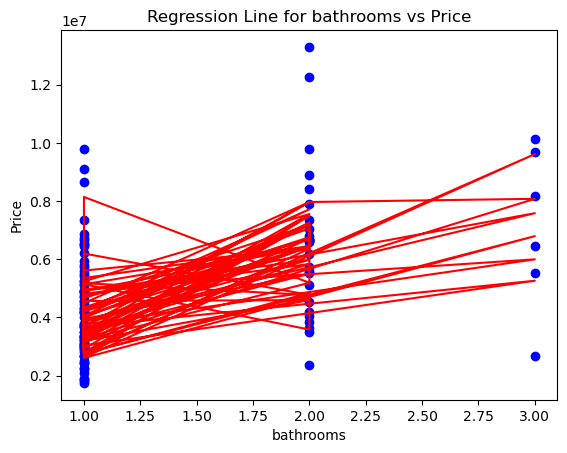

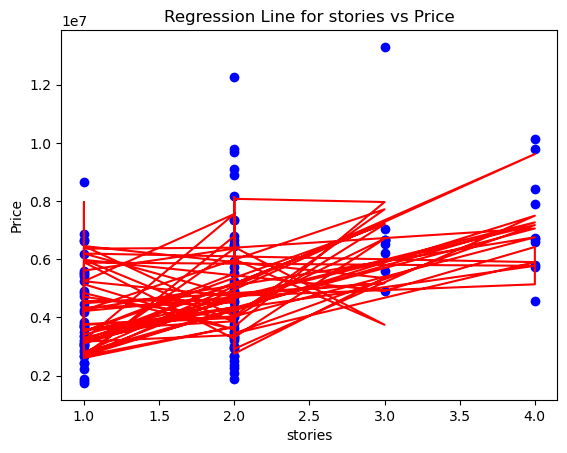

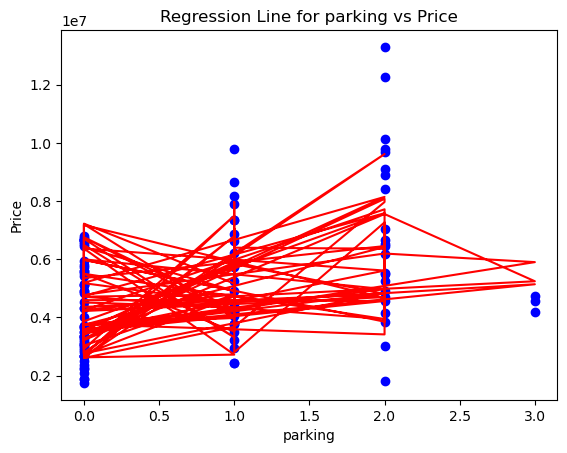

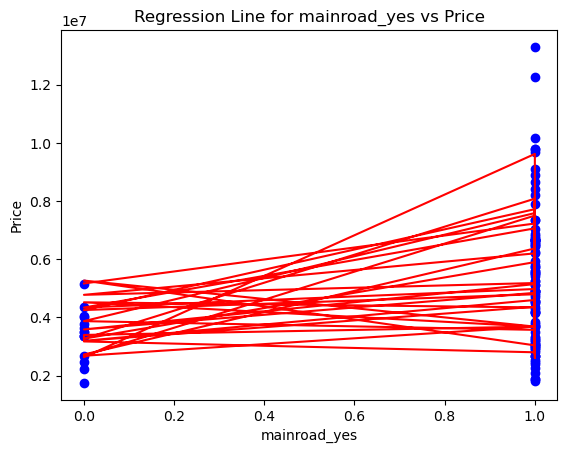

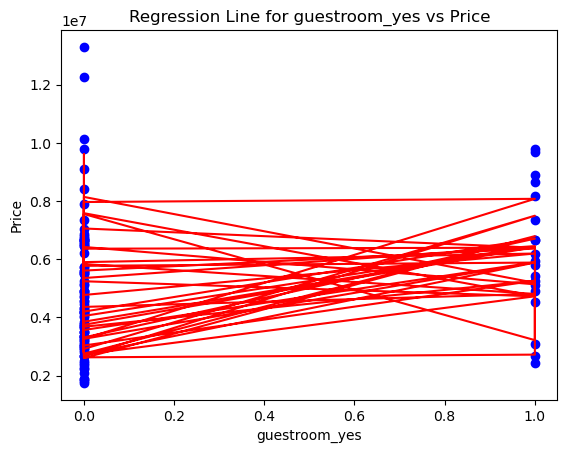

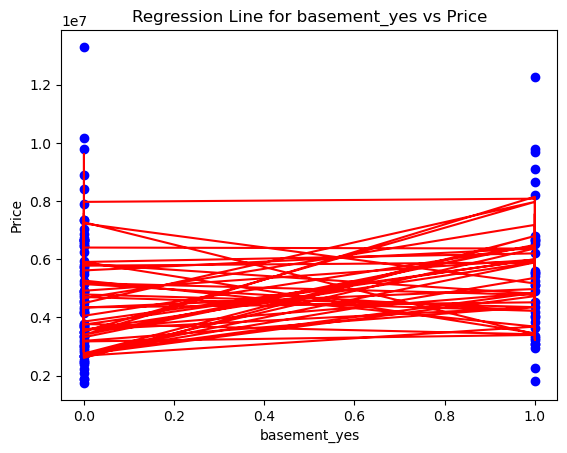

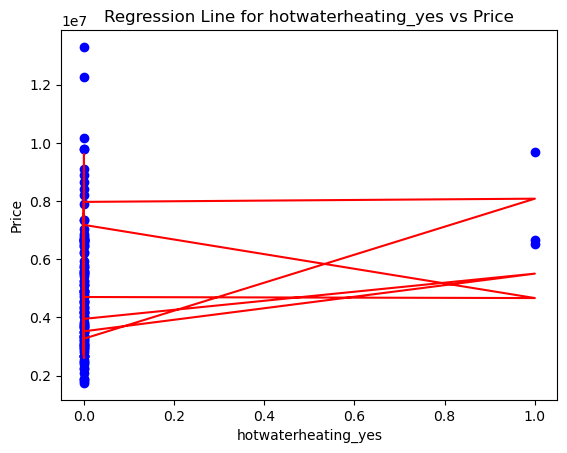

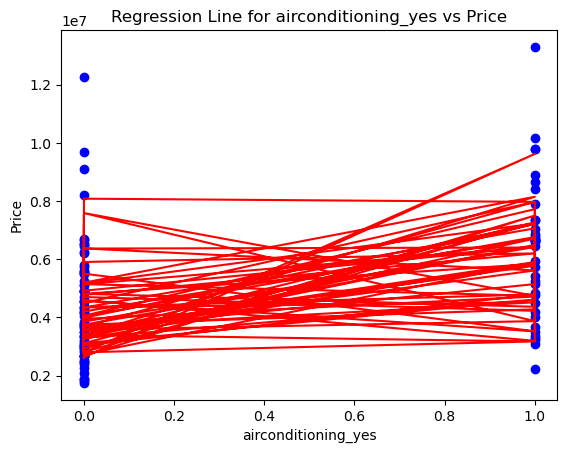

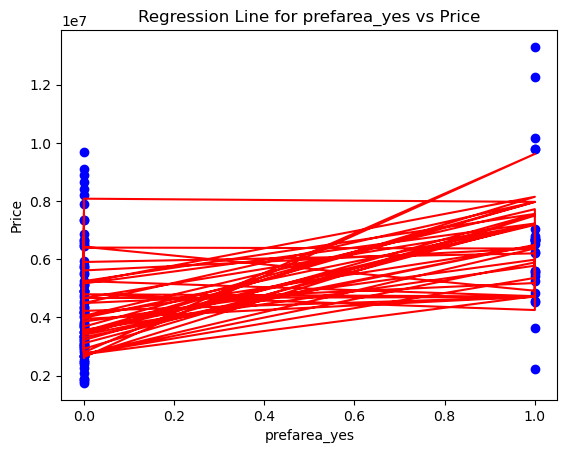

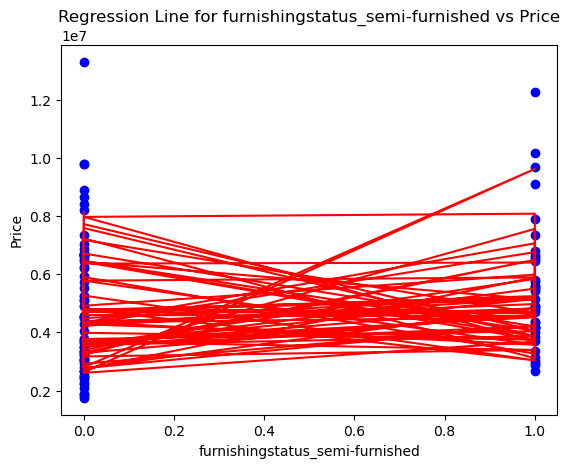

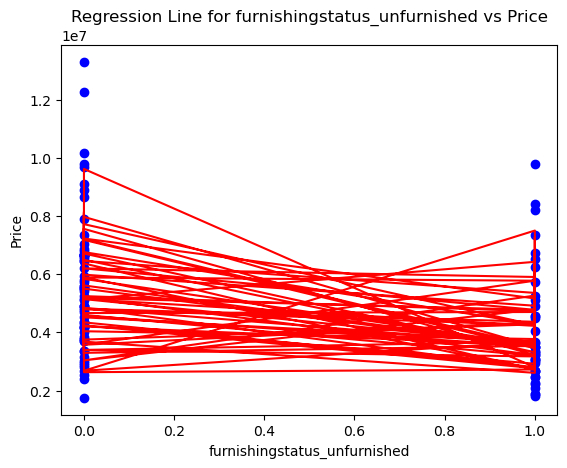

In [14]:
# Plotting for each feature individually
features = X_test.columns  # List of features

for feature in features:
    plt.scatter(X_test[feature], y_test, color='blue')  # Actual values
    plt.plot(X_test[feature], y_pred, color='red')  # Predicted line for each feature
    plt.title(f'Regression Line for {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()


### Interpret Coefficients:

In [15]:
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  2.24841913e+05  3.67919948e+05  2.31610037e+05  3.90251176e+05
  6.84649885e+05  7.91426736e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
Intercept: 260032.35760741308
